compute the MLE, i.e. maximize log-likelihood function

In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [2]:
include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")
using .Src

In [72]:
a_true = 1.1
n0_true = 2.3
noise = 1.0
M = 10

hprm = Src.Hyperprm(0.95, n0_true, a_true, 0.45, M, noise)

Main.Src.Hyperprm(0.95, 2.3, 1.1, 0.45, 10, 1.0)

In [73]:
sol_true = Src.sol_klausmeier(hprm; t_fixed=true, t_end=500.0) # returns df
sol_true = Src.randomize_data(sol_true, hprm.noise)

if noise == 0.0 # in no noise case stick to true prm combination
    mle, success = [a_true, n0_true], true
else
    mle, success = Src.compute_mle(hprm, sol_true; t_fixed=true, t_end=500.0)
end


([1.1599055580122282, 1.1959898564924532], true)

In [74]:
using DataFrames, ForwardDiff, LinearAlgebra
function compute_fi(eval_pt::Vector{Float64}, hprm::Src.Hyperprm, true_val::DataFrame; t_fixed::Bool=false, t_end::Float64=50.0, t_step::Float64=1.0)
    H = ForwardDiff.hessian(x -> Src.compute_ll(x, hprm, true_val; t_fixed=t_fixed, t_end=t_end, t_step=t_step), eval_pt)
    print("EV: $(eigvals(H))")
    display(H)
    return tr(-H)
end

compute_fi (generic function with 1 method)

In [75]:
compute_fi(mle, hprm, sol_true; t_fixed=true, t_end=500.0), compute_fi([a_true,n0_true], hprm, sol_true; t_fixed=true, t_end=500.0)

2×2 Matrix{Float64}:
 -72.6505      -1.50895e-6
  -1.50895e-6  -1.0

2×2 Matrix{Float64}:
 -86.8616       3.45563e-7
   3.45563e-7  -1.0

EV: [-72.65049584605612, -0.9999996207186863]EV: [-86.86162553638769, -0.9999999998643709]

(73.6504954667748, 87.86162553625206)

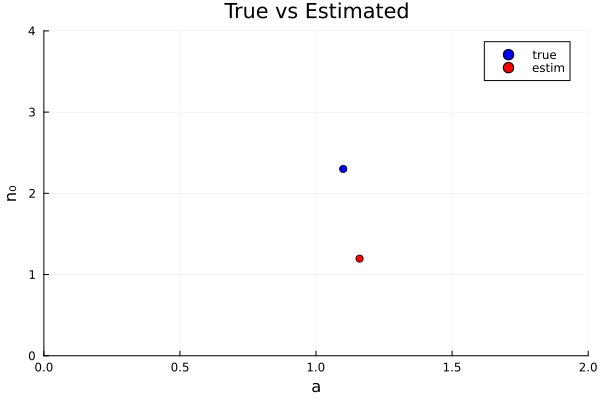

In [6]:
using Plots

scatter(
    [a_true], [n0_true], 
    label = "true", 
    color = :blue,
    xlabel = "a", ylabel = "n₀",
    xlims = (0, 2), ylims = (0, 4),
    legend = :topright,
    title = "True vs Estimated"
)

scatter!(
    [mle[1]], [mle[2]], 
    label = "estim", 
    color = :red
)